# Deep Learning with PyTorch


Author: [Anand Saha](http://teleported.in/)

### 3. Computer Vision: CNN for digits recognition

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from torch.autograd import Variable

from torchvision import datasets
from torchvision import transforms
import torch.nn.functional as F

In [2]:
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))])

mnist_train = datasets.MNIST('./data', train=True, download=True, transform=transform)
mnist_valid = datasets.MNIST('./data', train=False, download=True, transform=transform)

In [3]:
batch_size = 1024

In [4]:
mnist_train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=4)
mnist_valid_loader = torch.utils.data.DataLoader(mnist_valid, batch_size=batch_size, shuffle=True, num_workers=4)

In [5]:
class MNISTNet(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 20, kernel_size=5)
        self.conv2 = nn.Conv2d(20, 30, kernel_size=5)
        self.conv2_drop = nn.Dropout2d(p=0.5)
        self.fc1 = nn.Linear(480, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        
        x = self.conv1(x)
        x = F.max_pool2d(x, 2)
        x = F.relu(x)
        
        x = self.conv2(x)
        x = self.conv2_drop(x)
        x = F.max_pool2d(x, 2)
        x = F.relu(x)
        
        x = x.view(-1, 480)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=True)
        x = self.fc2(x)
        #return F.log_softmax(x, dim=1)
        return x

In [6]:
# The model
net = MNISTNet().cuda()

# Our loss function
criterion = nn.CrossEntropyLoss()

# Our optimizer
learning_rate = 0.01
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9) 

In [7]:
num_epochs = 100

train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []

for epoch in range(num_epochs):
    
    train_correct = 0
    train_total = 0
    
    for i, (items, classes) in enumerate(mnist_train_loader):
        
        # Convert torch tensor to Variable
        items = Variable(items.cuda())
        classes = Variable(classes.cuda())
        
        net.train()           # Put the network into training mode
        
        optimizer.zero_grad() # Clear off the gradients from any past operation
        outputs = net(items)  # Do the forward pass
        loss = criterion(outputs, classes) # Calculate the loss
        loss.backward()       # Calculate the gradients with help of back propagation
        optimizer.step()      # Ask the optimizer to adjust the parameters based on the gradients
        
        # Record the correct predictions for training data
        train_total += classes.size(0)    
        _, predicted = torch.max(outputs.data, 1)
        train_correct += (predicted == classes.data).sum()

        print ('Epoch %d/%d, Iteration %d/%d, Loss: %.4f' 
               %(epoch+1, num_epochs, i+1, len(mnist_train)//batch_size, loss.data[0]))

    net.eval()                 # Put the network into evaluation mode
    
    # Book keeping
    # Record the loss
    train_loss.append(loss.data[0])

    # What was our train accuracy?
    train_accuracy.append((100 * train_correct / train_total))
"""    
    # How did we do on the test set (the unseen set)
    # Record the correct predictions for test data
    test_items = torch.FloatTensor(test_ds.data.values[:, 0:4])
    test_classes = torch.LongTensor(test_ds.data.values[:, 4])

    outputs = net(Variable(test_items))
    loss = criterion(outputs, Variable(test_classes))
    test_loss.append(loss.data[0])
    _, predicted = torch.max(outputs.data, 1)
    total = test_classes.size(0)
    correct = (predicted == test_classes).sum()
    test_accuracy.append((100 * correct / total))
"""

Epoch 1/100, Iteration 1/58, Loss: 2.3117
Epoch 1/100, Iteration 2/58, Loss: 2.3144
Epoch 1/100, Iteration 3/58, Loss: 2.3093
Epoch 1/100, Iteration 4/58, Loss: 2.3066
Epoch 1/100, Iteration 5/58, Loss: 2.3090
Epoch 1/100, Iteration 6/58, Loss: 2.3087
Epoch 1/100, Iteration 7/58, Loss: 2.2974
Epoch 1/100, Iteration 8/58, Loss: 2.2954
Epoch 1/100, Iteration 9/58, Loss: 2.2865
Epoch 1/100, Iteration 10/58, Loss: 2.2893
Epoch 1/100, Iteration 11/58, Loss: 2.2848
Epoch 1/100, Iteration 12/58, Loss: 2.2819
Epoch 1/100, Iteration 13/58, Loss: 2.2784
Epoch 1/100, Iteration 14/58, Loss: 2.2668
Epoch 1/100, Iteration 15/58, Loss: 2.2615
Epoch 1/100, Iteration 16/58, Loss: 2.2598
Epoch 1/100, Iteration 17/58, Loss: 2.2541
Epoch 1/100, Iteration 18/58, Loss: 2.2519
Epoch 1/100, Iteration 19/58, Loss: 2.2416
Epoch 1/100, Iteration 20/58, Loss: 2.2303
Epoch 1/100, Iteration 21/58, Loss: 2.2215
Epoch 1/100, Iteration 22/58, Loss: 2.2198
Epoch 1/100, Iteration 23/58, Loss: 2.2151
Epoch 1/100, Iterati

Epoch 4/100, Iteration 25/58, Loss: 0.3453
Epoch 4/100, Iteration 26/58, Loss: 0.3756
Epoch 4/100, Iteration 27/58, Loss: 0.3815
Epoch 4/100, Iteration 28/58, Loss: 0.3372
Epoch 4/100, Iteration 29/58, Loss: 0.4227
Epoch 4/100, Iteration 30/58, Loss: 0.3834
Epoch 4/100, Iteration 31/58, Loss: 0.3355
Epoch 4/100, Iteration 32/58, Loss: 0.3786
Epoch 4/100, Iteration 33/58, Loss: 0.3612
Epoch 4/100, Iteration 34/58, Loss: 0.4097
Epoch 4/100, Iteration 35/58, Loss: 0.3829
Epoch 4/100, Iteration 36/58, Loss: 0.3637
Epoch 4/100, Iteration 37/58, Loss: 0.3746
Epoch 4/100, Iteration 38/58, Loss: 0.3120
Epoch 4/100, Iteration 39/58, Loss: 0.3559
Epoch 4/100, Iteration 40/58, Loss: 0.3268
Epoch 4/100, Iteration 41/58, Loss: 0.3688
Epoch 4/100, Iteration 42/58, Loss: 0.3873
Epoch 4/100, Iteration 43/58, Loss: 0.3200
Epoch 4/100, Iteration 44/58, Loss: 0.2983
Epoch 4/100, Iteration 45/58, Loss: 0.3627
Epoch 4/100, Iteration 46/58, Loss: 0.3253
Epoch 4/100, Iteration 47/58, Loss: 0.3601
Epoch 4/100

Epoch 7/100, Iteration 51/58, Loss: 0.2564
Epoch 7/100, Iteration 52/58, Loss: 0.2537
Epoch 7/100, Iteration 53/58, Loss: 0.2402
Epoch 7/100, Iteration 54/58, Loss: 0.2651
Epoch 7/100, Iteration 55/58, Loss: 0.1886
Epoch 7/100, Iteration 56/58, Loss: 0.2362
Epoch 7/100, Iteration 57/58, Loss: 0.2779
Epoch 7/100, Iteration 58/58, Loss: 0.2404
Epoch 7/100, Iteration 59/58, Loss: 0.2485
Epoch 8/100, Iteration 1/58, Loss: 0.2528
Epoch 8/100, Iteration 2/58, Loss: 0.2507
Epoch 8/100, Iteration 3/58, Loss: 0.2145
Epoch 8/100, Iteration 4/58, Loss: 0.2141
Epoch 8/100, Iteration 5/58, Loss: 0.2313
Epoch 8/100, Iteration 6/58, Loss: 0.2102
Epoch 8/100, Iteration 7/58, Loss: 0.2143
Epoch 8/100, Iteration 8/58, Loss: 0.2326
Epoch 8/100, Iteration 9/58, Loss: 0.2190
Epoch 8/100, Iteration 10/58, Loss: 0.2572
Epoch 8/100, Iteration 11/58, Loss: 0.2018
Epoch 8/100, Iteration 12/58, Loss: 0.2253
Epoch 8/100, Iteration 13/58, Loss: 0.2705
Epoch 8/100, Iteration 14/58, Loss: 0.2207
Epoch 8/100, Iterati

Epoch 11/100, Iteration 15/58, Loss: 0.2176
Epoch 11/100, Iteration 16/58, Loss: 0.2232
Epoch 11/100, Iteration 17/58, Loss: 0.2136
Epoch 11/100, Iteration 18/58, Loss: 0.1521
Epoch 11/100, Iteration 19/58, Loss: 0.2527
Epoch 11/100, Iteration 20/58, Loss: 0.1762
Epoch 11/100, Iteration 21/58, Loss: 0.2008
Epoch 11/100, Iteration 22/58, Loss: 0.1672
Epoch 11/100, Iteration 23/58, Loss: 0.2136
Epoch 11/100, Iteration 24/58, Loss: 0.1994
Epoch 11/100, Iteration 25/58, Loss: 0.2055
Epoch 11/100, Iteration 26/58, Loss: 0.2202
Epoch 11/100, Iteration 27/58, Loss: 0.1506
Epoch 11/100, Iteration 28/58, Loss: 0.2254
Epoch 11/100, Iteration 29/58, Loss: 0.1885
Epoch 11/100, Iteration 30/58, Loss: 0.1962
Epoch 11/100, Iteration 31/58, Loss: 0.1814
Epoch 11/100, Iteration 32/58, Loss: 0.2164
Epoch 11/100, Iteration 33/58, Loss: 0.1566
Epoch 11/100, Iteration 34/58, Loss: 0.1930
Epoch 11/100, Iteration 35/58, Loss: 0.1911
Epoch 11/100, Iteration 36/58, Loss: 0.1774
Epoch 11/100, Iteration 37/58, L

Epoch 14/100, Iteration 25/58, Loss: 0.1746
Epoch 14/100, Iteration 26/58, Loss: 0.1747
Epoch 14/100, Iteration 27/58, Loss: 0.1571
Epoch 14/100, Iteration 28/58, Loss: 0.1551
Epoch 14/100, Iteration 29/58, Loss: 0.1636
Epoch 14/100, Iteration 30/58, Loss: 0.1306
Epoch 14/100, Iteration 31/58, Loss: 0.1885
Epoch 14/100, Iteration 32/58, Loss: 0.1315
Epoch 14/100, Iteration 33/58, Loss: 0.2177
Epoch 14/100, Iteration 34/58, Loss: 0.1596
Epoch 14/100, Iteration 35/58, Loss: 0.1757
Epoch 14/100, Iteration 36/58, Loss: 0.2110
Epoch 14/100, Iteration 37/58, Loss: 0.1686
Epoch 14/100, Iteration 38/58, Loss: 0.1983
Epoch 14/100, Iteration 39/58, Loss: 0.2104
Epoch 14/100, Iteration 40/58, Loss: 0.1532
Epoch 14/100, Iteration 41/58, Loss: 0.1704
Epoch 14/100, Iteration 42/58, Loss: 0.1554
Epoch 14/100, Iteration 43/58, Loss: 0.2138
Epoch 14/100, Iteration 44/58, Loss: 0.1667
Epoch 14/100, Iteration 45/58, Loss: 0.2008
Epoch 14/100, Iteration 46/58, Loss: 0.1811
Epoch 14/100, Iteration 47/58, L

Epoch 17/100, Iteration 39/58, Loss: 0.1570
Epoch 17/100, Iteration 40/58, Loss: 0.1461
Epoch 17/100, Iteration 41/58, Loss: 0.1734
Epoch 17/100, Iteration 42/58, Loss: 0.1682
Epoch 17/100, Iteration 43/58, Loss: 0.1644
Epoch 17/100, Iteration 44/58, Loss: 0.1537
Epoch 17/100, Iteration 45/58, Loss: 0.1509
Epoch 17/100, Iteration 46/58, Loss: 0.1281
Epoch 17/100, Iteration 47/58, Loss: 0.1449
Epoch 17/100, Iteration 48/58, Loss: 0.1358
Epoch 17/100, Iteration 49/58, Loss: 0.1540
Epoch 17/100, Iteration 50/58, Loss: 0.1469
Epoch 17/100, Iteration 51/58, Loss: 0.1610
Epoch 17/100, Iteration 52/58, Loss: 0.1709
Epoch 17/100, Iteration 53/58, Loss: 0.1502
Epoch 17/100, Iteration 54/58, Loss: 0.1372
Epoch 17/100, Iteration 55/58, Loss: 0.1498
Epoch 17/100, Iteration 56/58, Loss: 0.1468
Epoch 17/100, Iteration 57/58, Loss: 0.1218
Epoch 17/100, Iteration 58/58, Loss: 0.2219
Epoch 17/100, Iteration 59/58, Loss: 0.1502
Epoch 18/100, Iteration 1/58, Loss: 0.1764
Epoch 18/100, Iteration 2/58, Los

Epoch 20/100, Iteration 54/58, Loss: 0.1431
Epoch 20/100, Iteration 55/58, Loss: 0.1243
Epoch 20/100, Iteration 56/58, Loss: 0.1386
Epoch 20/100, Iteration 57/58, Loss: 0.1460
Epoch 20/100, Iteration 58/58, Loss: 0.1292
Epoch 20/100, Iteration 59/58, Loss: 0.1670
Epoch 21/100, Iteration 1/58, Loss: 0.1154
Epoch 21/100, Iteration 2/58, Loss: 0.1437
Epoch 21/100, Iteration 3/58, Loss: 0.1718
Epoch 21/100, Iteration 4/58, Loss: 0.1383
Epoch 21/100, Iteration 5/58, Loss: 0.1205
Epoch 21/100, Iteration 6/58, Loss: 0.1262
Epoch 21/100, Iteration 7/58, Loss: 0.1402
Epoch 21/100, Iteration 8/58, Loss: 0.1685
Epoch 21/100, Iteration 9/58, Loss: 0.1589
Epoch 21/100, Iteration 10/58, Loss: 0.1493
Epoch 21/100, Iteration 11/58, Loss: 0.1467
Epoch 21/100, Iteration 12/58, Loss: 0.1281
Epoch 21/100, Iteration 13/58, Loss: 0.1798
Epoch 21/100, Iteration 14/58, Loss: 0.1498
Epoch 21/100, Iteration 15/58, Loss: 0.1471
Epoch 21/100, Iteration 16/58, Loss: 0.1268
Epoch 21/100, Iteration 17/58, Loss: 0.13

Epoch 24/100, Iteration 15/58, Loss: 0.1238
Epoch 24/100, Iteration 16/58, Loss: 0.1617
Epoch 24/100, Iteration 17/58, Loss: 0.1407
Epoch 24/100, Iteration 18/58, Loss: 0.1207
Epoch 24/100, Iteration 19/58, Loss: 0.1000
Epoch 24/100, Iteration 20/58, Loss: 0.1550
Epoch 24/100, Iteration 21/58, Loss: 0.1425
Epoch 24/100, Iteration 22/58, Loss: 0.1406
Epoch 24/100, Iteration 23/58, Loss: 0.1373
Epoch 24/100, Iteration 24/58, Loss: 0.1237
Epoch 24/100, Iteration 25/58, Loss: 0.1244
Epoch 24/100, Iteration 26/58, Loss: 0.1328
Epoch 24/100, Iteration 27/58, Loss: 0.1297
Epoch 24/100, Iteration 28/58, Loss: 0.1311
Epoch 24/100, Iteration 29/58, Loss: 0.1602
Epoch 24/100, Iteration 30/58, Loss: 0.1263
Epoch 24/100, Iteration 31/58, Loss: 0.1728
Epoch 24/100, Iteration 32/58, Loss: 0.1448
Epoch 24/100, Iteration 33/58, Loss: 0.1549
Epoch 24/100, Iteration 34/58, Loss: 0.1234
Epoch 24/100, Iteration 35/58, Loss: 0.1514
Epoch 24/100, Iteration 36/58, Loss: 0.1475
Epoch 24/100, Iteration 37/58, L

Epoch 27/100, Iteration 25/58, Loss: 0.1382
Epoch 27/100, Iteration 26/58, Loss: 0.1249
Epoch 27/100, Iteration 27/58, Loss: 0.1346
Epoch 27/100, Iteration 28/58, Loss: 0.1433
Epoch 27/100, Iteration 29/58, Loss: 0.1141
Epoch 27/100, Iteration 30/58, Loss: 0.1653
Epoch 27/100, Iteration 31/58, Loss: 0.1429
Epoch 27/100, Iteration 32/58, Loss: 0.1418
Epoch 27/100, Iteration 33/58, Loss: 0.1054
Epoch 27/100, Iteration 34/58, Loss: 0.1452
Epoch 27/100, Iteration 35/58, Loss: 0.1398
Epoch 27/100, Iteration 36/58, Loss: 0.1564
Epoch 27/100, Iteration 37/58, Loss: 0.1309
Epoch 27/100, Iteration 38/58, Loss: 0.1268
Epoch 27/100, Iteration 39/58, Loss: 0.1240
Epoch 27/100, Iteration 40/58, Loss: 0.1493
Epoch 27/100, Iteration 41/58, Loss: 0.1575
Epoch 27/100, Iteration 42/58, Loss: 0.1210
Epoch 27/100, Iteration 43/58, Loss: 0.0972
Epoch 27/100, Iteration 44/58, Loss: 0.1553
Epoch 27/100, Iteration 45/58, Loss: 0.1441
Epoch 27/100, Iteration 46/58, Loss: 0.1206
Epoch 27/100, Iteration 47/58, L

Epoch 30/100, Iteration 39/58, Loss: 0.1260
Epoch 30/100, Iteration 40/58, Loss: 0.1447
Epoch 30/100, Iteration 41/58, Loss: 0.1198
Epoch 30/100, Iteration 42/58, Loss: 0.1415
Epoch 30/100, Iteration 43/58, Loss: 0.1059
Epoch 30/100, Iteration 44/58, Loss: 0.1323
Epoch 30/100, Iteration 45/58, Loss: 0.1256
Epoch 30/100, Iteration 46/58, Loss: 0.1473
Epoch 30/100, Iteration 47/58, Loss: 0.1325
Epoch 30/100, Iteration 48/58, Loss: 0.1107
Epoch 30/100, Iteration 49/58, Loss: 0.1310
Epoch 30/100, Iteration 50/58, Loss: 0.1440
Epoch 30/100, Iteration 51/58, Loss: 0.1203
Epoch 30/100, Iteration 52/58, Loss: 0.1375
Epoch 30/100, Iteration 53/58, Loss: 0.0953
Epoch 30/100, Iteration 54/58, Loss: 0.1097
Epoch 30/100, Iteration 55/58, Loss: 0.1213
Epoch 30/100, Iteration 56/58, Loss: 0.1414
Epoch 30/100, Iteration 57/58, Loss: 0.1178
Epoch 30/100, Iteration 58/58, Loss: 0.0943
Epoch 30/100, Iteration 59/58, Loss: 0.1069
Epoch 31/100, Iteration 1/58, Loss: 0.1270
Epoch 31/100, Iteration 2/58, Los

Epoch 33/100, Iteration 51/58, Loss: 0.1309
Epoch 33/100, Iteration 52/58, Loss: 0.1042
Epoch 33/100, Iteration 53/58, Loss: 0.1116
Epoch 33/100, Iteration 54/58, Loss: 0.1054
Epoch 33/100, Iteration 55/58, Loss: 0.0869
Epoch 33/100, Iteration 56/58, Loss: 0.1144
Epoch 33/100, Iteration 57/58, Loss: 0.1059
Epoch 33/100, Iteration 58/58, Loss: 0.1076
Epoch 33/100, Iteration 59/58, Loss: 0.1181
Epoch 34/100, Iteration 1/58, Loss: 0.1057
Epoch 34/100, Iteration 2/58, Loss: 0.1143
Epoch 34/100, Iteration 3/58, Loss: 0.1139
Epoch 34/100, Iteration 4/58, Loss: 0.1145
Epoch 34/100, Iteration 5/58, Loss: 0.1055
Epoch 34/100, Iteration 6/58, Loss: 0.1147
Epoch 34/100, Iteration 7/58, Loss: 0.1093
Epoch 34/100, Iteration 8/58, Loss: 0.1342
Epoch 34/100, Iteration 9/58, Loss: 0.0952
Epoch 34/100, Iteration 10/58, Loss: 0.1133
Epoch 34/100, Iteration 11/58, Loss: 0.1377
Epoch 34/100, Iteration 12/58, Loss: 0.0923
Epoch 34/100, Iteration 13/58, Loss: 0.1304
Epoch 34/100, Iteration 14/58, Loss: 0.12

Epoch 37/100, Iteration 15/58, Loss: 0.1216
Epoch 37/100, Iteration 16/58, Loss: 0.1358
Epoch 37/100, Iteration 17/58, Loss: 0.1214
Epoch 37/100, Iteration 18/58, Loss: 0.1089
Epoch 37/100, Iteration 19/58, Loss: 0.1108
Epoch 37/100, Iteration 20/58, Loss: 0.1704
Epoch 37/100, Iteration 21/58, Loss: 0.0847
Epoch 37/100, Iteration 22/58, Loss: 0.1160
Epoch 37/100, Iteration 23/58, Loss: 0.1097
Epoch 37/100, Iteration 24/58, Loss: 0.1092
Epoch 37/100, Iteration 25/58, Loss: 0.1220
Epoch 37/100, Iteration 26/58, Loss: 0.1077
Epoch 37/100, Iteration 27/58, Loss: 0.1073
Epoch 37/100, Iteration 28/58, Loss: 0.0826
Epoch 37/100, Iteration 29/58, Loss: 0.1018
Epoch 37/100, Iteration 30/58, Loss: 0.1373
Epoch 37/100, Iteration 31/58, Loss: 0.1337
Epoch 37/100, Iteration 32/58, Loss: 0.1085
Epoch 37/100, Iteration 33/58, Loss: 0.1026
Epoch 37/100, Iteration 34/58, Loss: 0.0939
Epoch 37/100, Iteration 35/58, Loss: 0.0951
Epoch 37/100, Iteration 36/58, Loss: 0.0938
Epoch 37/100, Iteration 37/58, L

Epoch 40/100, Iteration 25/58, Loss: 0.0879
Epoch 40/100, Iteration 26/58, Loss: 0.1055
Epoch 40/100, Iteration 27/58, Loss: 0.1055
Epoch 40/100, Iteration 28/58, Loss: 0.1130
Epoch 40/100, Iteration 29/58, Loss: 0.1162
Epoch 40/100, Iteration 30/58, Loss: 0.1103
Epoch 40/100, Iteration 31/58, Loss: 0.1212
Epoch 40/100, Iteration 32/58, Loss: 0.0754
Epoch 40/100, Iteration 33/58, Loss: 0.0913
Epoch 40/100, Iteration 34/58, Loss: 0.0932
Epoch 40/100, Iteration 35/58, Loss: 0.1019
Epoch 40/100, Iteration 36/58, Loss: 0.1331
Epoch 40/100, Iteration 37/58, Loss: 0.1175
Epoch 40/100, Iteration 38/58, Loss: 0.1191
Epoch 40/100, Iteration 39/58, Loss: 0.1312
Epoch 40/100, Iteration 40/58, Loss: 0.1015
Epoch 40/100, Iteration 41/58, Loss: 0.0953
Epoch 40/100, Iteration 42/58, Loss: 0.0967
Epoch 40/100, Iteration 43/58, Loss: 0.0974
Epoch 40/100, Iteration 44/58, Loss: 0.1119
Epoch 40/100, Iteration 45/58, Loss: 0.1229
Epoch 40/100, Iteration 46/58, Loss: 0.1028
Epoch 40/100, Iteration 47/58, L

Epoch 43/100, Iteration 38/58, Loss: 0.0888
Epoch 43/100, Iteration 39/58, Loss: 0.0962
Epoch 43/100, Iteration 40/58, Loss: 0.1091
Epoch 43/100, Iteration 41/58, Loss: 0.1319
Epoch 43/100, Iteration 42/58, Loss: 0.1306
Epoch 43/100, Iteration 43/58, Loss: 0.1251
Epoch 43/100, Iteration 44/58, Loss: 0.1444
Epoch 43/100, Iteration 45/58, Loss: 0.1284
Epoch 43/100, Iteration 46/58, Loss: 0.1020
Epoch 43/100, Iteration 47/58, Loss: 0.1001
Epoch 43/100, Iteration 48/58, Loss: 0.0784
Epoch 43/100, Iteration 49/58, Loss: 0.1300
Epoch 43/100, Iteration 50/58, Loss: 0.1110
Epoch 43/100, Iteration 51/58, Loss: 0.1125
Epoch 43/100, Iteration 52/58, Loss: 0.1322
Epoch 43/100, Iteration 53/58, Loss: 0.0988
Epoch 43/100, Iteration 54/58, Loss: 0.0938
Epoch 43/100, Iteration 55/58, Loss: 0.0836
Epoch 43/100, Iteration 56/58, Loss: 0.0982
Epoch 43/100, Iteration 57/58, Loss: 0.1105
Epoch 43/100, Iteration 58/58, Loss: 0.0895
Epoch 43/100, Iteration 59/58, Loss: 0.0752
Epoch 44/100, Iteration 1/58, Lo

Epoch 46/100, Iteration 53/58, Loss: 0.1266
Epoch 46/100, Iteration 54/58, Loss: 0.0985
Epoch 46/100, Iteration 55/58, Loss: 0.1275
Epoch 46/100, Iteration 56/58, Loss: 0.1153
Epoch 46/100, Iteration 57/58, Loss: 0.0816
Epoch 46/100, Iteration 58/58, Loss: 0.0798
Epoch 46/100, Iteration 59/58, Loss: 0.1009
Epoch 47/100, Iteration 1/58, Loss: 0.0931
Epoch 47/100, Iteration 2/58, Loss: 0.0762
Epoch 47/100, Iteration 3/58, Loss: 0.1118
Epoch 47/100, Iteration 4/58, Loss: 0.0902
Epoch 47/100, Iteration 5/58, Loss: 0.0874
Epoch 47/100, Iteration 6/58, Loss: 0.0952
Epoch 47/100, Iteration 7/58, Loss: 0.0755
Epoch 47/100, Iteration 8/58, Loss: 0.0963
Epoch 47/100, Iteration 9/58, Loss: 0.0905
Epoch 47/100, Iteration 10/58, Loss: 0.1059
Epoch 47/100, Iteration 11/58, Loss: 0.0919
Epoch 47/100, Iteration 12/58, Loss: 0.0769
Epoch 47/100, Iteration 13/58, Loss: 0.1076
Epoch 47/100, Iteration 14/58, Loss: 0.1191
Epoch 47/100, Iteration 15/58, Loss: 0.1021
Epoch 47/100, Iteration 16/58, Loss: 0.10

Epoch 50/100, Iteration 15/58, Loss: 0.0874
Epoch 50/100, Iteration 16/58, Loss: 0.1154
Epoch 50/100, Iteration 17/58, Loss: 0.0948
Epoch 50/100, Iteration 18/58, Loss: 0.1249
Epoch 50/100, Iteration 19/58, Loss: 0.0837
Epoch 50/100, Iteration 20/58, Loss: 0.0806
Epoch 50/100, Iteration 21/58, Loss: 0.1061
Epoch 50/100, Iteration 22/58, Loss: 0.0910
Epoch 50/100, Iteration 23/58, Loss: 0.0961
Epoch 50/100, Iteration 24/58, Loss: 0.0828
Epoch 50/100, Iteration 25/58, Loss: 0.1006
Epoch 50/100, Iteration 26/58, Loss: 0.1011
Epoch 50/100, Iteration 27/58, Loss: 0.0785
Epoch 50/100, Iteration 28/58, Loss: 0.1067
Epoch 50/100, Iteration 29/58, Loss: 0.1024
Epoch 50/100, Iteration 30/58, Loss: 0.1133
Epoch 50/100, Iteration 31/58, Loss: 0.1141
Epoch 50/100, Iteration 32/58, Loss: 0.0952
Epoch 50/100, Iteration 33/58, Loss: 0.1093
Epoch 50/100, Iteration 34/58, Loss: 0.0875
Epoch 50/100, Iteration 35/58, Loss: 0.0682
Epoch 50/100, Iteration 36/58, Loss: 0.1189
Epoch 50/100, Iteration 37/58, L

Epoch 53/100, Iteration 25/58, Loss: 0.0920
Epoch 53/100, Iteration 26/58, Loss: 0.1120
Epoch 53/100, Iteration 27/58, Loss: 0.0996
Epoch 53/100, Iteration 28/58, Loss: 0.1007
Epoch 53/100, Iteration 29/58, Loss: 0.0959
Epoch 53/100, Iteration 30/58, Loss: 0.1092
Epoch 53/100, Iteration 31/58, Loss: 0.1058
Epoch 53/100, Iteration 32/58, Loss: 0.1158
Epoch 53/100, Iteration 33/58, Loss: 0.1121
Epoch 53/100, Iteration 34/58, Loss: 0.1036
Epoch 53/100, Iteration 35/58, Loss: 0.0720
Epoch 53/100, Iteration 36/58, Loss: 0.0938
Epoch 53/100, Iteration 37/58, Loss: 0.1024
Epoch 53/100, Iteration 38/58, Loss: 0.0751
Epoch 53/100, Iteration 39/58, Loss: 0.0760
Epoch 53/100, Iteration 40/58, Loss: 0.0850
Epoch 53/100, Iteration 41/58, Loss: 0.0739
Epoch 53/100, Iteration 42/58, Loss: 0.0891
Epoch 53/100, Iteration 43/58, Loss: 0.0957
Epoch 53/100, Iteration 44/58, Loss: 0.1102
Epoch 53/100, Iteration 45/58, Loss: 0.0925
Epoch 53/100, Iteration 46/58, Loss: 0.1012
Epoch 53/100, Iteration 47/58, L

Epoch 56/100, Iteration 39/58, Loss: 0.1096
Epoch 56/100, Iteration 40/58, Loss: 0.1128
Epoch 56/100, Iteration 41/58, Loss: 0.1280
Epoch 56/100, Iteration 42/58, Loss: 0.1047
Epoch 56/100, Iteration 43/58, Loss: 0.0849
Epoch 56/100, Iteration 44/58, Loss: 0.0912
Epoch 56/100, Iteration 45/58, Loss: 0.1060
Epoch 56/100, Iteration 46/58, Loss: 0.0720
Epoch 56/100, Iteration 47/58, Loss: 0.0878
Epoch 56/100, Iteration 48/58, Loss: 0.0936
Epoch 56/100, Iteration 49/58, Loss: 0.0754
Epoch 56/100, Iteration 50/58, Loss: 0.0931
Epoch 56/100, Iteration 51/58, Loss: 0.0788
Epoch 56/100, Iteration 52/58, Loss: 0.0914
Epoch 56/100, Iteration 53/58, Loss: 0.0550
Epoch 56/100, Iteration 54/58, Loss: 0.0561
Epoch 56/100, Iteration 55/58, Loss: 0.0847
Epoch 56/100, Iteration 56/58, Loss: 0.0771
Epoch 56/100, Iteration 57/58, Loss: 0.0726
Epoch 56/100, Iteration 58/58, Loss: 0.0938
Epoch 56/100, Iteration 59/58, Loss: 0.0812
Epoch 57/100, Iteration 1/58, Loss: 0.0602
Epoch 57/100, Iteration 2/58, Los

Epoch 59/100, Iteration 51/58, Loss: 0.1142
Epoch 59/100, Iteration 52/58, Loss: 0.0746
Epoch 59/100, Iteration 53/58, Loss: 0.1104
Epoch 59/100, Iteration 54/58, Loss: 0.0907
Epoch 59/100, Iteration 55/58, Loss: 0.1031
Epoch 59/100, Iteration 56/58, Loss: 0.1019
Epoch 59/100, Iteration 57/58, Loss: 0.0782
Epoch 59/100, Iteration 58/58, Loss: 0.0986
Epoch 59/100, Iteration 59/58, Loss: 0.1191
Epoch 60/100, Iteration 1/58, Loss: 0.0906
Epoch 60/100, Iteration 2/58, Loss: 0.0816
Epoch 60/100, Iteration 3/58, Loss: 0.0809
Epoch 60/100, Iteration 4/58, Loss: 0.0673
Epoch 60/100, Iteration 5/58, Loss: 0.0942
Epoch 60/100, Iteration 6/58, Loss: 0.0653
Epoch 60/100, Iteration 7/58, Loss: 0.0908
Epoch 60/100, Iteration 8/58, Loss: 0.1034
Epoch 60/100, Iteration 9/58, Loss: 0.0948
Epoch 60/100, Iteration 10/58, Loss: 0.0921
Epoch 60/100, Iteration 11/58, Loss: 0.0735
Epoch 60/100, Iteration 12/58, Loss: 0.1129
Epoch 60/100, Iteration 13/58, Loss: 0.0904
Epoch 60/100, Iteration 14/58, Loss: 0.09

Epoch 63/100, Iteration 14/58, Loss: 0.1106
Epoch 63/100, Iteration 15/58, Loss: 0.0763
Epoch 63/100, Iteration 16/58, Loss: 0.0808
Epoch 63/100, Iteration 17/58, Loss: 0.0748
Epoch 63/100, Iteration 18/58, Loss: 0.0886
Epoch 63/100, Iteration 19/58, Loss: 0.0691
Epoch 63/100, Iteration 20/58, Loss: 0.0796
Epoch 63/100, Iteration 21/58, Loss: 0.0735
Epoch 63/100, Iteration 22/58, Loss: 0.0613
Epoch 63/100, Iteration 23/58, Loss: 0.0937
Epoch 63/100, Iteration 24/58, Loss: 0.0769
Epoch 63/100, Iteration 25/58, Loss: 0.0778
Epoch 63/100, Iteration 26/58, Loss: 0.0794
Epoch 63/100, Iteration 27/58, Loss: 0.0900
Epoch 63/100, Iteration 28/58, Loss: 0.0931
Epoch 63/100, Iteration 29/58, Loss: 0.0900
Epoch 63/100, Iteration 30/58, Loss: 0.0543
Epoch 63/100, Iteration 31/58, Loss: 0.0765
Epoch 63/100, Iteration 32/58, Loss: 0.1149
Epoch 63/100, Iteration 33/58, Loss: 0.1330
Epoch 63/100, Iteration 34/58, Loss: 0.0770
Epoch 63/100, Iteration 35/58, Loss: 0.0540
Epoch 63/100, Iteration 36/58, L

Epoch 66/100, Iteration 25/58, Loss: 0.0836
Epoch 66/100, Iteration 26/58, Loss: 0.0899
Epoch 66/100, Iteration 27/58, Loss: 0.0795
Epoch 66/100, Iteration 28/58, Loss: 0.1140
Epoch 66/100, Iteration 29/58, Loss: 0.0812
Epoch 66/100, Iteration 30/58, Loss: 0.0937
Epoch 66/100, Iteration 31/58, Loss: 0.0878
Epoch 66/100, Iteration 32/58, Loss: 0.0830
Epoch 66/100, Iteration 33/58, Loss: 0.0748
Epoch 66/100, Iteration 34/58, Loss: 0.0915
Epoch 66/100, Iteration 35/58, Loss: 0.0970
Epoch 66/100, Iteration 36/58, Loss: 0.0961
Epoch 66/100, Iteration 37/58, Loss: 0.0896
Epoch 66/100, Iteration 38/58, Loss: 0.0736
Epoch 66/100, Iteration 39/58, Loss: 0.0780
Epoch 66/100, Iteration 40/58, Loss: 0.0953
Epoch 66/100, Iteration 41/58, Loss: 0.0937
Epoch 66/100, Iteration 42/58, Loss: 0.0959
Epoch 66/100, Iteration 43/58, Loss: 0.0895
Epoch 66/100, Iteration 44/58, Loss: 0.0811
Epoch 66/100, Iteration 45/58, Loss: 0.0613
Epoch 66/100, Iteration 46/58, Loss: 0.0868
Epoch 66/100, Iteration 47/58, L

Epoch 69/100, Iteration 40/58, Loss: 0.0764
Epoch 69/100, Iteration 41/58, Loss: 0.0705
Epoch 69/100, Iteration 42/58, Loss: 0.1058
Epoch 69/100, Iteration 43/58, Loss: 0.0878
Epoch 69/100, Iteration 44/58, Loss: 0.0785
Epoch 69/100, Iteration 45/58, Loss: 0.0822
Epoch 69/100, Iteration 46/58, Loss: 0.1018
Epoch 69/100, Iteration 47/58, Loss: 0.0753
Epoch 69/100, Iteration 48/58, Loss: 0.0948
Epoch 69/100, Iteration 49/58, Loss: 0.0760
Epoch 69/100, Iteration 50/58, Loss: 0.0955
Epoch 69/100, Iteration 51/58, Loss: 0.0721
Epoch 69/100, Iteration 52/58, Loss: 0.0631
Epoch 69/100, Iteration 53/58, Loss: 0.0705
Epoch 69/100, Iteration 54/58, Loss: 0.0908
Epoch 69/100, Iteration 55/58, Loss: 0.0885
Epoch 69/100, Iteration 56/58, Loss: 0.0944
Epoch 69/100, Iteration 57/58, Loss: 0.0643
Epoch 69/100, Iteration 58/58, Loss: 0.0847
Epoch 69/100, Iteration 59/58, Loss: 0.0853
Epoch 70/100, Iteration 1/58, Loss: 0.0969
Epoch 70/100, Iteration 2/58, Loss: 0.0843
Epoch 70/100, Iteration 3/58, Loss

Epoch 72/100, Iteration 52/58, Loss: 0.0718
Epoch 72/100, Iteration 53/58, Loss: 0.0750
Epoch 72/100, Iteration 54/58, Loss: 0.0773
Epoch 72/100, Iteration 55/58, Loss: 0.0644
Epoch 72/100, Iteration 56/58, Loss: 0.0569
Epoch 72/100, Iteration 57/58, Loss: 0.0892
Epoch 72/100, Iteration 58/58, Loss: 0.0803
Epoch 72/100, Iteration 59/58, Loss: 0.0576
Epoch 73/100, Iteration 1/58, Loss: 0.0867
Epoch 73/100, Iteration 2/58, Loss: 0.0801
Epoch 73/100, Iteration 3/58, Loss: 0.1004
Epoch 73/100, Iteration 4/58, Loss: 0.0684
Epoch 73/100, Iteration 5/58, Loss: 0.0733
Epoch 73/100, Iteration 6/58, Loss: 0.1003
Epoch 73/100, Iteration 7/58, Loss: 0.0617
Epoch 73/100, Iteration 8/58, Loss: 0.1001
Epoch 73/100, Iteration 9/58, Loss: 0.0883
Epoch 73/100, Iteration 10/58, Loss: 0.0548
Epoch 73/100, Iteration 11/58, Loss: 0.0835
Epoch 73/100, Iteration 12/58, Loss: 0.0678
Epoch 73/100, Iteration 13/58, Loss: 0.0852
Epoch 73/100, Iteration 14/58, Loss: 0.1188
Epoch 73/100, Iteration 15/58, Loss: 0.09

Epoch 76/100, Iteration 15/58, Loss: 0.0900
Epoch 76/100, Iteration 16/58, Loss: 0.0725
Epoch 76/100, Iteration 17/58, Loss: 0.0697
Epoch 76/100, Iteration 18/58, Loss: 0.0983
Epoch 76/100, Iteration 19/58, Loss: 0.1128
Epoch 76/100, Iteration 20/58, Loss: 0.0754
Epoch 76/100, Iteration 21/58, Loss: 0.0683
Epoch 76/100, Iteration 22/58, Loss: 0.0809
Epoch 76/100, Iteration 23/58, Loss: 0.0808
Epoch 76/100, Iteration 24/58, Loss: 0.0631
Epoch 76/100, Iteration 25/58, Loss: 0.0905
Epoch 76/100, Iteration 26/58, Loss: 0.0868
Epoch 76/100, Iteration 27/58, Loss: 0.0911
Epoch 76/100, Iteration 28/58, Loss: 0.0493
Epoch 76/100, Iteration 29/58, Loss: 0.0902
Epoch 76/100, Iteration 30/58, Loss: 0.0974
Epoch 76/100, Iteration 31/58, Loss: 0.0589
Epoch 76/100, Iteration 32/58, Loss: 0.0827
Epoch 76/100, Iteration 33/58, Loss: 0.0605
Epoch 76/100, Iteration 34/58, Loss: 0.0807
Epoch 76/100, Iteration 35/58, Loss: 0.0588
Epoch 76/100, Iteration 36/58, Loss: 0.1191
Epoch 76/100, Iteration 37/58, L

Epoch 79/100, Iteration 25/58, Loss: 0.0927
Epoch 79/100, Iteration 26/58, Loss: 0.0871
Epoch 79/100, Iteration 27/58, Loss: 0.0951
Epoch 79/100, Iteration 28/58, Loss: 0.0923
Epoch 79/100, Iteration 29/58, Loss: 0.0768
Epoch 79/100, Iteration 30/58, Loss: 0.0984
Epoch 79/100, Iteration 31/58, Loss: 0.0749
Epoch 79/100, Iteration 32/58, Loss: 0.0824
Epoch 79/100, Iteration 33/58, Loss: 0.0779
Epoch 79/100, Iteration 34/58, Loss: 0.0964
Epoch 79/100, Iteration 35/58, Loss: 0.0853
Epoch 79/100, Iteration 36/58, Loss: 0.0674
Epoch 79/100, Iteration 37/58, Loss: 0.0835
Epoch 79/100, Iteration 38/58, Loss: 0.0780
Epoch 79/100, Iteration 39/58, Loss: 0.0900
Epoch 79/100, Iteration 40/58, Loss: 0.0651
Epoch 79/100, Iteration 41/58, Loss: 0.0791
Epoch 79/100, Iteration 42/58, Loss: 0.0998
Epoch 79/100, Iteration 43/58, Loss: 0.0792
Epoch 79/100, Iteration 44/58, Loss: 0.0792
Epoch 79/100, Iteration 45/58, Loss: 0.0876
Epoch 79/100, Iteration 46/58, Loss: 0.0574
Epoch 79/100, Iteration 47/58, L

Epoch 82/100, Iteration 38/58, Loss: 0.0598
Epoch 82/100, Iteration 39/58, Loss: 0.0890
Epoch 82/100, Iteration 40/58, Loss: 0.1126
Epoch 82/100, Iteration 41/58, Loss: 0.0592
Epoch 82/100, Iteration 42/58, Loss: 0.1101
Epoch 82/100, Iteration 43/58, Loss: 0.0822
Epoch 82/100, Iteration 44/58, Loss: 0.0679
Epoch 82/100, Iteration 45/58, Loss: 0.0688
Epoch 82/100, Iteration 46/58, Loss: 0.0772
Epoch 82/100, Iteration 47/58, Loss: 0.0591
Epoch 82/100, Iteration 48/58, Loss: 0.0797
Epoch 82/100, Iteration 49/58, Loss: 0.0846
Epoch 82/100, Iteration 50/58, Loss: 0.0955
Epoch 82/100, Iteration 51/58, Loss: 0.0809
Epoch 82/100, Iteration 52/58, Loss: 0.0543
Epoch 82/100, Iteration 53/58, Loss: 0.0801
Epoch 82/100, Iteration 54/58, Loss: 0.0744
Epoch 82/100, Iteration 55/58, Loss: 0.1075
Epoch 82/100, Iteration 56/58, Loss: 0.0729
Epoch 82/100, Iteration 57/58, Loss: 0.0714
Epoch 82/100, Iteration 58/58, Loss: 0.0864
Epoch 82/100, Iteration 59/58, Loss: 0.0856
Epoch 83/100, Iteration 1/58, Lo

Epoch 85/100, Iteration 49/58, Loss: 0.0662
Epoch 85/100, Iteration 50/58, Loss: 0.0620
Epoch 85/100, Iteration 51/58, Loss: 0.0916
Epoch 85/100, Iteration 52/58, Loss: 0.0831
Epoch 85/100, Iteration 53/58, Loss: 0.0609
Epoch 85/100, Iteration 54/58, Loss: 0.0755
Epoch 85/100, Iteration 55/58, Loss: 0.0870
Epoch 85/100, Iteration 56/58, Loss: 0.1013
Epoch 85/100, Iteration 57/58, Loss: 0.0739
Epoch 85/100, Iteration 58/58, Loss: 0.0730
Epoch 85/100, Iteration 59/58, Loss: 0.0659
Epoch 86/100, Iteration 1/58, Loss: 0.0897
Epoch 86/100, Iteration 2/58, Loss: 0.0612
Epoch 86/100, Iteration 3/58, Loss: 0.0455
Epoch 86/100, Iteration 4/58, Loss: 0.0828
Epoch 86/100, Iteration 5/58, Loss: 0.0874
Epoch 86/100, Iteration 6/58, Loss: 0.1002
Epoch 86/100, Iteration 7/58, Loss: 0.0915
Epoch 86/100, Iteration 8/58, Loss: 0.0850
Epoch 86/100, Iteration 9/58, Loss: 0.0538
Epoch 86/100, Iteration 10/58, Loss: 0.1003
Epoch 86/100, Iteration 11/58, Loss: 0.0560
Epoch 86/100, Iteration 12/58, Loss: 0.06

Epoch 89/100, Iteration 1/58, Loss: 0.0649
Epoch 89/100, Iteration 2/58, Loss: 0.0782
Epoch 89/100, Iteration 3/58, Loss: 0.1019
Epoch 89/100, Iteration 4/58, Loss: 0.0697
Epoch 89/100, Iteration 5/58, Loss: 0.0578
Epoch 89/100, Iteration 6/58, Loss: 0.0960
Epoch 89/100, Iteration 7/58, Loss: 0.0561
Epoch 89/100, Iteration 8/58, Loss: 0.0618
Epoch 89/100, Iteration 9/58, Loss: 0.0759
Epoch 89/100, Iteration 10/58, Loss: 0.0835
Epoch 89/100, Iteration 11/58, Loss: 0.0907
Epoch 89/100, Iteration 12/58, Loss: 0.0652
Epoch 89/100, Iteration 13/58, Loss: 0.0749
Epoch 89/100, Iteration 14/58, Loss: 0.0650
Epoch 89/100, Iteration 15/58, Loss: 0.0824
Epoch 89/100, Iteration 16/58, Loss: 0.0735
Epoch 89/100, Iteration 17/58, Loss: 0.0502
Epoch 89/100, Iteration 18/58, Loss: 0.0746
Epoch 89/100, Iteration 19/58, Loss: 0.0701
Epoch 89/100, Iteration 20/58, Loss: 0.0530
Epoch 89/100, Iteration 21/58, Loss: 0.1148
Epoch 89/100, Iteration 22/58, Loss: 0.0643
Epoch 89/100, Iteration 23/58, Loss: 0.09

Epoch 92/100, Iteration 15/58, Loss: 0.0922
Epoch 92/100, Iteration 16/58, Loss: 0.1031
Epoch 92/100, Iteration 17/58, Loss: 0.0794
Epoch 92/100, Iteration 18/58, Loss: 0.0958
Epoch 92/100, Iteration 19/58, Loss: 0.1065
Epoch 92/100, Iteration 20/58, Loss: 0.1041
Epoch 92/100, Iteration 21/58, Loss: 0.0859
Epoch 92/100, Iteration 22/58, Loss: 0.0737
Epoch 92/100, Iteration 23/58, Loss: 0.0784
Epoch 92/100, Iteration 24/58, Loss: 0.0576
Epoch 92/100, Iteration 25/58, Loss: 0.0737
Epoch 92/100, Iteration 26/58, Loss: 0.0956
Epoch 92/100, Iteration 27/58, Loss: 0.0642
Epoch 92/100, Iteration 28/58, Loss: 0.0632
Epoch 92/100, Iteration 29/58, Loss: 0.0655
Epoch 92/100, Iteration 30/58, Loss: 0.0791
Epoch 92/100, Iteration 31/58, Loss: 0.0749
Epoch 92/100, Iteration 32/58, Loss: 0.0859
Epoch 92/100, Iteration 33/58, Loss: 0.0747
Epoch 92/100, Iteration 34/58, Loss: 0.0618
Epoch 92/100, Iteration 35/58, Loss: 0.0638
Epoch 92/100, Iteration 36/58, Loss: 0.0703
Epoch 92/100, Iteration 37/58, L

Epoch 95/100, Iteration 25/58, Loss: 0.0802
Epoch 95/100, Iteration 26/58, Loss: 0.0791
Epoch 95/100, Iteration 27/58, Loss: 0.0680
Epoch 95/100, Iteration 28/58, Loss: 0.0630
Epoch 95/100, Iteration 29/58, Loss: 0.0599
Epoch 95/100, Iteration 30/58, Loss: 0.0700
Epoch 95/100, Iteration 31/58, Loss: 0.0808
Epoch 95/100, Iteration 32/58, Loss: 0.0753
Epoch 95/100, Iteration 33/58, Loss: 0.0809
Epoch 95/100, Iteration 34/58, Loss: 0.0709
Epoch 95/100, Iteration 35/58, Loss: 0.0909
Epoch 95/100, Iteration 36/58, Loss: 0.0560
Epoch 95/100, Iteration 37/58, Loss: 0.0595
Epoch 95/100, Iteration 38/58, Loss: 0.0631
Epoch 95/100, Iteration 39/58, Loss: 0.1021
Epoch 95/100, Iteration 40/58, Loss: 0.0785
Epoch 95/100, Iteration 41/58, Loss: 0.0811
Epoch 95/100, Iteration 42/58, Loss: 0.0764
Epoch 95/100, Iteration 43/58, Loss: 0.0586
Epoch 95/100, Iteration 44/58, Loss: 0.0809
Epoch 95/100, Iteration 45/58, Loss: 0.0657
Epoch 95/100, Iteration 46/58, Loss: 0.0635
Epoch 95/100, Iteration 47/58, L

Epoch 98/100, Iteration 38/58, Loss: 0.0701
Epoch 98/100, Iteration 39/58, Loss: 0.0642
Epoch 98/100, Iteration 40/58, Loss: 0.0610
Epoch 98/100, Iteration 41/58, Loss: 0.0850
Epoch 98/100, Iteration 42/58, Loss: 0.0508
Epoch 98/100, Iteration 43/58, Loss: 0.0612
Epoch 98/100, Iteration 44/58, Loss: 0.0932
Epoch 98/100, Iteration 45/58, Loss: 0.0629
Epoch 98/100, Iteration 46/58, Loss: 0.0732
Epoch 98/100, Iteration 47/58, Loss: 0.0729
Epoch 98/100, Iteration 48/58, Loss: 0.0901
Epoch 98/100, Iteration 49/58, Loss: 0.0532
Epoch 98/100, Iteration 50/58, Loss: 0.0800
Epoch 98/100, Iteration 51/58, Loss: 0.0645
Epoch 98/100, Iteration 52/58, Loss: 0.0914
Epoch 98/100, Iteration 53/58, Loss: 0.0712
Epoch 98/100, Iteration 54/58, Loss: 0.0457
Epoch 98/100, Iteration 55/58, Loss: 0.1027
Epoch 98/100, Iteration 56/58, Loss: 0.0490
Epoch 98/100, Iteration 57/58, Loss: 0.0825
Epoch 98/100, Iteration 58/58, Loss: 0.0869
Epoch 98/100, Iteration 59/58, Loss: 0.0590
Epoch 99/100, Iteration 1/58, Lo

'    \n    # How did we do on the test set (the unseen set)\n    # Record the correct predictions for test data\n    test_items = torch.FloatTensor(test_ds.data.values[:, 0:4])\n    test_classes = torch.LongTensor(test_ds.data.values[:, 4])\n\n    outputs = net(Variable(test_items))\n    loss = criterion(outputs, Variable(test_classes))\n    test_loss.append(loss.data[0])\n    _, predicted = torch.max(outputs.data, 1)\n    total = test_classes.size(0)\n    correct = (predicted == test_classes).sum()\n    test_accuracy.append((100 * correct / total))\n'

In [10]:
train_accuracy

[33.20666666666666,
 78.57833333333333,
 86.33833333333334,
 89.36166666666666,
 90.81833333333333,
 92.06,
 92.46333333333334,
 93.20166666666667,
 93.60333333333334,
 93.995,
 94.275,
 94.395,
 94.77333333333333,
 94.86,
 95.11,
 95.30833333333334,
 95.355,
 95.58333333333333,
 95.54333333333334,
 95.87,
 95.93666666666667,
 96.045,
 95.87333333333333,
 96.07333333333334,
 96.10166666666667,
 96.17833333333333,
 96.24333333333334,
 96.38,
 96.47333333333333,
 96.47333333333333,
 96.455,
 96.57833333333333,
 96.565,
 96.55,
 96.76833333333333,
 96.67333333333333,
 96.72,
 96.805,
 96.81833333333333,
 96.86333333333333,
 96.88666666666667,
 96.97166666666666,
 96.95,
 96.98333333333333,
 97.06666666666666,
 97.00833333333334,
 97.14,
 97.14666666666666,
 97.08,
 97.12666666666667,
 97.22333333333333,
 97.24666666666667,
 97.23166666666667,
 97.27666666666667,
 97.18166666666667,
 97.28666666666666,
 97.24166666666666,
 97.33166666666666,
 97.38,
 97.33,
 97.39166666666667,
 97.45333333

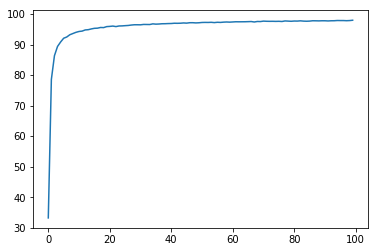

In [9]:
plt.plot(train_accuracy)